In [2]:
from skimage import io, color
import matplotlib.pyplot as plt
import numpy as np

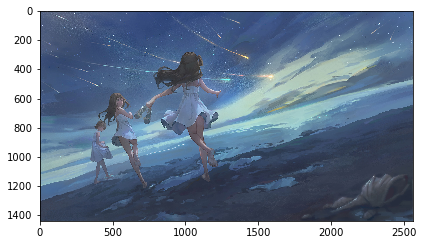

In [4]:
picpath = r'images/3.jpg'
img = io.imread(picpath)
img_gray = io.imread(picpath, as_gray=True)
io.imshow(img)

<h2>连通域标记与选择(不懂)
<h3>1)获取连通域及其属性

from skimage import filters,measure
"""
thresh = filters.threshold_otsu(img_gray)    # 用otsu算法确定最佳分割阈值
bwimg =(img_gray>=(thresh))  # 用阈值进行分割，生成二值图像
"""
labels = measure.label(img_bw)   # 标记连通域
label_att = measure.regionprops(labels) # 获取各个连通域的属性。

<h3>2)噪音处理</h3>
img1是删除了小于连通域面积阈值的二值图像。<br>
其中，各参数含义如下：<br>
ar: 上边的获取的标记好连通域的数组<br>
connectivity: 邻接模式，1表示4邻接，2表示8邻接<br>
in_place: bool型值，如果为True,表示直接在输入图像中删除小块区域，否则进行复制后再删除。默认为False.

from skimage import morphology<br>
img1 = morphology.remove_small_objects(img_bw, min_size=要删除的连通域大小阈值, connectivity=1,in_place=False)<br>
io.imshow(img1)

labels = measure.label（Binary Image,connectivity=None)

<h2>Histogram</h2>
1)Caluculate

In [22]:
from skimage import exposure
hist = exposure.histogram(img, nbins=256)
hist

<ipython-input-22-9cc0acf48f6e>:2: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist = exposure.histogram(img, nbins=256)


(array([     27,      13,      19,      20,      30,      24,      31,
             27,      34,      40,      42,      33,      35,      37,
             26,      23,      32,      53,      55,      68,      77,
             89,      67,     101,      99,     116,     122,     134,
            154,     155,     168,     187,     207,     209,     203,
            168,     223,     214,     258,     308,     344,     413,
            485,     576,     655,     719,     717,     803,     922,
            977,    1026,    1110,    1186,    1269,    1302,    1375,
           1437,    1517,    1612,    1675,    1764,    1948,    2028,
           2387,    2410,    2589,    2924,    3144,    3485,    3770,
           4025,    4272,    4657,    5057,    5565,    6580,    6385,
           6782,    6792,    7078,    7416,    8051,    8346,    8685,
           8928,    9295,    9818,   10849,   11291,   12199,   13161,
          13831,   13964,   14160,   15317,   15825,   16285,   16723,
      

2)Paint

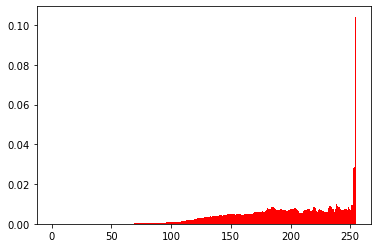

In [23]:
attr = img.flatten()
n, bins, patches = plt.hist(attr, bins=256, density=1,edgecolor='None',facecolor='red')

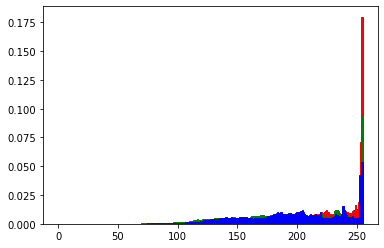

In [24]:
ar=img[:,:,0].flatten()
plt.hist(ar, bins=256, density=1,facecolor='r',edgecolor='r')
ag=img[:,:,1].flatten()
plt.hist(ag, bins=256, density=1, facecolor='g',edgecolor='g')
ab=img[:,:,2].flatten()
plt.hist(ab, bins=256, density=1, facecolor='b',edgecolor='b')
plt.show()

D:\tools\Python\lib\site-packages\skimage\exposure\exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


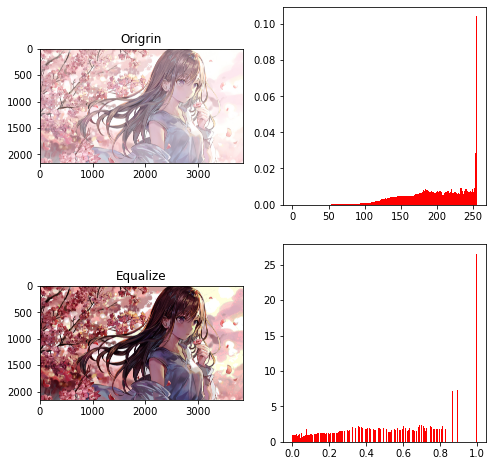

In [25]:
plt.figure("hist",figsize=(8,8))

arr=img.flatten()
plt.subplot(221)
plt.title("Origrin")
plt.imshow(img,plt.cm.gray)  #原始图像
plt.subplot(222)
plt.hist(arr, bins=256, density=1,edgecolor='None',facecolor='red') #原始图像直方图

img1=exposure.equalize_hist(img)
arr1=img1.flatten()
plt.subplot(223)
plt.title("Equalize")
plt.imshow(img1,plt.cm.gray)  #均衡化图像
plt.subplot(224)
plt.hist(arr1, bins=256, density=1,edgecolor='None',facecolor='red') #均衡化直方图

plt.show()

<h2>Edge Detect

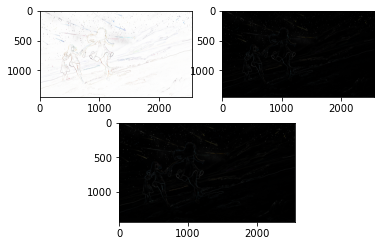

In [14]:
from skimage import filters, feature, exposure
from skimage.color.adapt_rgb import adapt_rgb, each_channel

# rgb adaptor
@adapt_rgb(each_channel)
def sobel_each(image):
    return filters.sobel(image)



plt.subplot(221)
# 反色
edges1 = exposure.rescale_intensity(1 - sobel_each(img)) 
plt.imshow(edges1)
plt.subplot(222)
edges2 = filters.prewitt(img)
plt.imshow(edges2)
plt.subplot(212)
edges3 = filters.scharr(img)
plt.imshow(edges3)
plt.show()

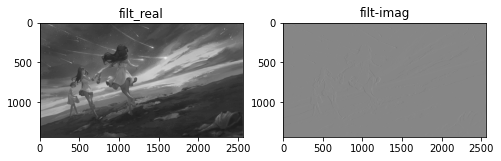

In [6]:
filt_real, filt_imag = filters.gabor(img_gray,frequency=0.8)   

plt.figure('gabor',figsize=(8,8))

plt.subplot(121)
plt.title('filt_real')
plt.imshow(filt_real,plt.cm.gray)  

plt.subplot(122)
plt.title('filt-imag')
plt.imshow(filt_imag,plt.cm.gray)

plt.show()

<ipython-input-28-1239369ec442>:1: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  edges0 = filters.gaussian(img,sigma=5)   # sigma=0.4


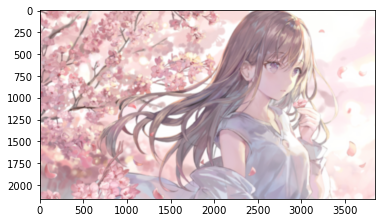

In [28]:
edges0 = filters.gaussian(img,sigma=5)   # sigma=0.4
plt.imshow(edges0)

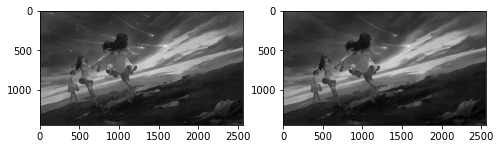

In [7]:
from skimage.morphology import disk

edges4 = filters.median(img_gray,disk(5))
edges5= filters.median(img_gray,disk(9))
plt.figure('median',figsize=(8,8))

plt.subplot(121)
plt.imshow(edges4,plt.cm.gray)  

plt.subplot(122)
plt.imshow(edges5,plt.cm.gray)

plt.show()

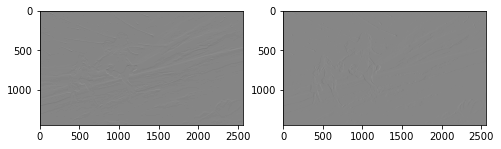

In [8]:
edges6 = filters.sobel_h(img_gray)  
edges7 = filters.sobel_v(img_gray) 

plt.figure('sobel_v_h',figsize=(8,8))

plt.subplot(121)
plt.imshow(edges6,plt.cm.gray)  

plt.subplot(122)
plt.imshow(edges7,plt.cm.gray)

plt.show()

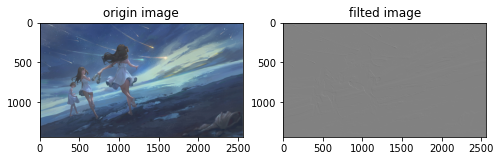

In [9]:
dst1 =filters.roberts_neg_diag(img_gray) 

plt.figure('filters',figsize=(8,8))
plt.subplot(121)
plt.title('origin image')
plt.imshow(img,plt.cm.gray)

plt.subplot(122)
plt.title('filted image')
plt.imshow(dst1,plt.cm.gray)

<h2>Threshold Calucalate

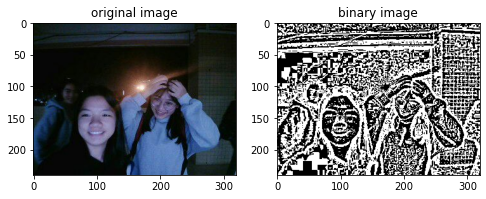

In [14]:
thresh = filters.threshold_local(img_gray, 15)   #返回一个阈值
dst2 =(img_gray <= thresh)*1.0   #根据阈值进行分割

plt.figure('thresh',figsize=(8,8))

plt.subplot(121)
plt.title('original image')
plt.imshow(img,plt.cm.gray)

plt.subplot(122)
plt.title('binary image')
plt.imshow(dst2,plt.cm.gray)

plt.show()

<h2>Painting

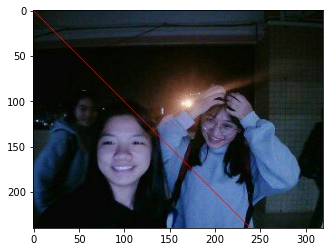

In [15]:
from skimage import draw,data
import matplotlib.pyplot as plt
rr, cc =draw.line(1, 1, 1000, 1000)
draw.set_color(img,[rr,cc],[255,0,0])
plt.imshow(img,plt.cm.gray)

<ipython-input-16-8f38ee4dd376>:2: FutureWarning: circle is deprecated in favor of disk.circle will be removed in version 0.19
  rr, cc=draw.circle(550,550,50)


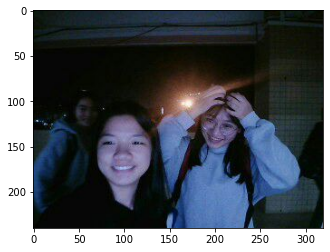

In [16]:
img = io.imread(picpath)
rr, cc=draw.circle(550,550,50)
draw.set_color(img,[rr,cc],[255,0,0])
plt.imshow(img,plt.cm.gray)

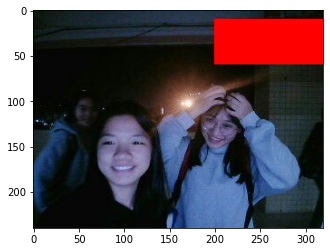

In [17]:
img = io.imread(picpath)
Y=np.array([10,10,60,60])
X=np.array([200,400,400,200])
rr, cc=draw.polygon(Y,X)
draw.set_color(img,[rr,cc],[255,0,0])
plt.imshow(img,plt.cm.gray)

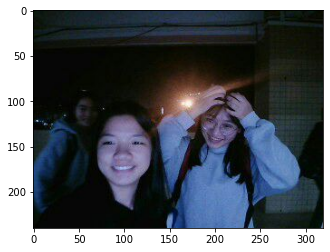

In [18]:
img = io.imread(picpath)
rr, cc=draw.ellipse(750, 650, 30, 80)
draw.set_color(img,[rr,cc],[255,0,0])
plt.imshow(img,plt.cm.gray)

<h2>形态学处理

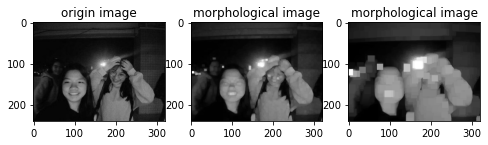

In [19]:
import skimage.morphology as sm
dst1=sm.dilation(img_gray,sm.square(5))  #用边长为5的正方形滤波器进行膨胀滤波
dst2=sm.dilation(img_gray,sm.square(15))  #用边长为15的正方形滤波器进行膨胀滤波

plt.figure('morphology',figsize=(8,8))
plt.subplot(131)
plt.title('origin image')
plt.imshow(img_gray,plt.cm.gray)

plt.subplot(132)
plt.title('morphological image')
plt.imshow(dst1,plt.cm.gray)

plt.subplot(133)
plt.title('morphological image')
plt.imshow(dst2,plt.cm.gray)

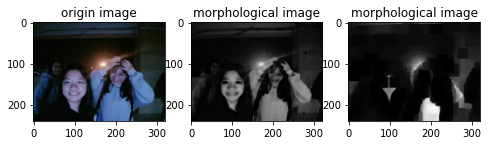

In [20]:
dst1=sm.erosion(img_gray,sm.square(5))  #用边长为5的正方形滤波器进行腐蚀
dst2=sm.erosion(img_gray,sm.square(25))  #用边长为25的正方形滤波器进行腐蚀

plt.figure('morphology',figsize=(8,8))
plt.subplot(131)
plt.title('origin image')
plt.imshow(img,plt.cm.gray)

plt.subplot(132)
plt.title('morphological image')
plt.imshow(dst1,plt.cm.gray)

plt.subplot(133)
plt.title('morphological image')
plt.imshow(dst2,plt.cm.gray)

<h2>Advanced morphological processing
</h2>Here doesn't introduce any more.

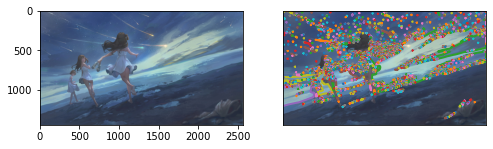

In [5]:
from skimage import measure,draw 
#生成二值测试图像


#检测所有图形的轮廓
contours = measure.find_contours(img_gray, 0.5)

#绘制轮廓
fig, (ax0,ax1) = plt.subplots(1,2,figsize=(8,8))
ax0.imshow(img,plt.cm.gray)
ax1.imshow(img,plt.cm.gray)
for n, contour in enumerate(contours):
    ax1.plot(contour[:, 1], contour[:, 0], linewidth=2)
ax1.axis('image')
ax1.set_xticks([])
ax1.set_yticks([])
plt.show()

<H2>Face Detect

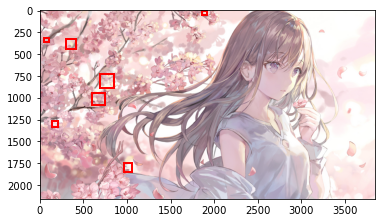

In [49]:
from skimage import data
from skimage.feature import Cascade
from matplotlib import patches

# Load the trained file from the module root.
trained_file = data.lbp_frontal_face_cascade_filename()
img = io.imread("./images/4.jpg")
# Initialize the detector cascade.
detector = Cascade(trained_file)
detected = detector.detect_multi_scale(img=img,
                                       scale_factor=1.1,
                                       step_ratio=1,
                                       min_size=(50, 50),
                                       max_size=(300,300))

plt.imshow(img)
img_desc = plt.gca()
plt.set_cmap('gray')

for patch in detected:
    img_desc.add_patch(
        patches.Rectangle(
            (patch['c'], patch['r']),
            patch['width'],
            patch['height'],
            fill=False,
            color='r',
            linewidth=2
        )
    )

plt.show()

Compose